### Moving Average Model

https://github.com/ritvikmath/Time-Series-Analysis/blob/master/MA%20Model.ipynb

### Generate some data

yt=50+0.5et-1+0.3et-2+et

et ~ N(0,1)

In [1]:
#generate 400 random numbers from a normal distribution with mean 0 and standard deviation 1
import numpy as np
errors=np.random.normal(0,1,400)

In [2]:
import pandas as pd
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')
date_index

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=123, freq='D')

In [5]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [6]:
series = pd.Series(series, date_index)
series.head()

2019-09-01    49.642708
2019-09-02    50.646315
2019-09-03    50.565703
2019-09-04    50.471455
2019-09-05    52.001332
Freq: D, dtype: float64

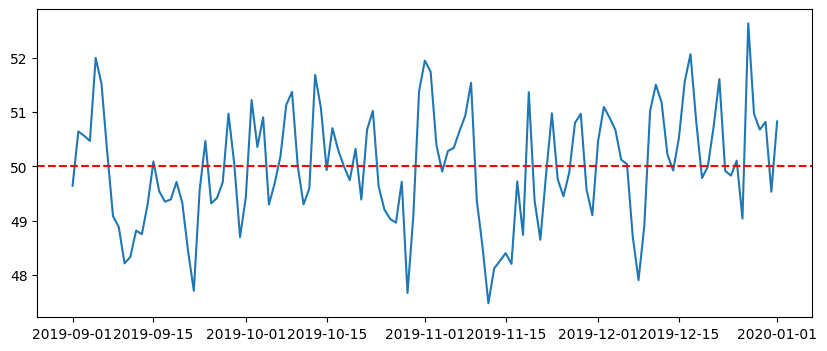

In [8]:

from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, color='r', linestyle='--')

In [9]:
from statsmodels.tsa.stattools import acf, pacf
acf_values=acf(series)
acf_values

array([ 1.00000000e+00,  5.22114709e-01,  1.61245345e-01,  2.13908928e-02,
        5.75273750e-02,  1.37648652e-01,  2.02192804e-02, -7.28368357e-02,
        8.94500518e-04,  2.82530200e-02,  7.64169485e-03, -7.28940896e-02,
       -7.55355186e-02, -5.72498435e-02,  1.76313980e-02, -4.45666871e-04,
       -4.95047371e-02,  3.90836730e-02,  8.94091648e-02,  3.46387430e-02,
       -7.53027205e-02])

In [10]:
len(acf_values)

21

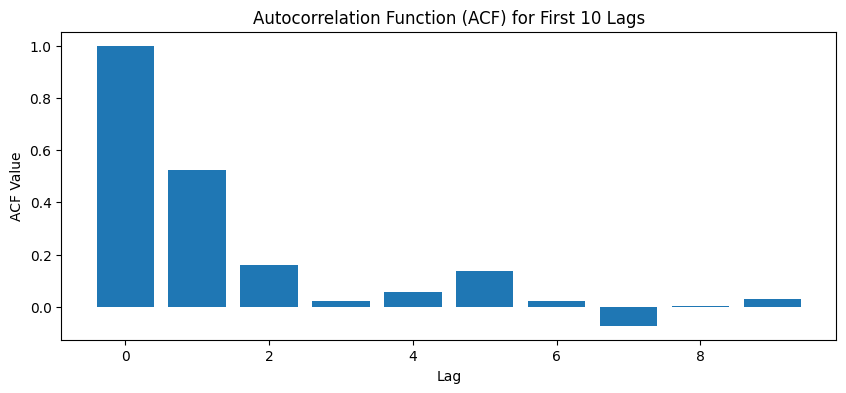

In [11]:
plt.figure(figsize=(10,4))
plt.bar(range(10), acf_values[:10])
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.title('Autocorrelation Function (ACF) for First 10 Lags')
plt.show()

cutoff seems to be 2

In [12]:
pacf_values=pacf(series)
len(pacf_values)

21

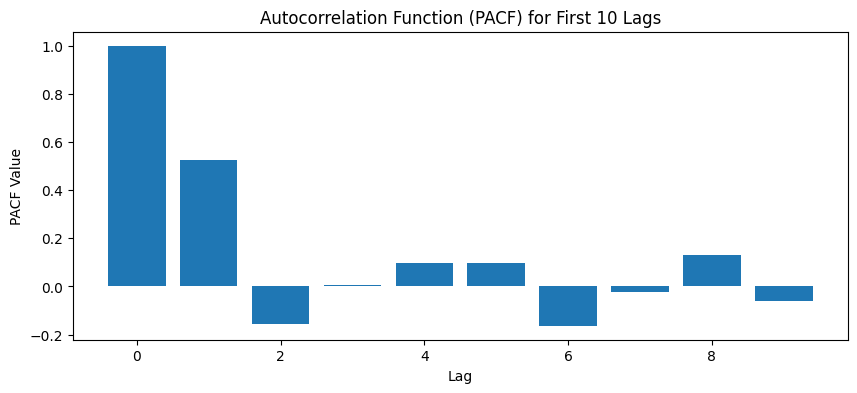

In [13]:
plt.figure(figsize=(10,4))
plt.bar(range(10), pacf_values[:10])
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.title('Autocorrelation Function (PACF) for First 10 Lags')
plt.show()

### Get the training and testing datasets

In [14]:
from datetime import datetime, timedelta
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]
train_data

2019-09-01    49.642708
2019-09-02    50.646315
2019-09-03    50.565703
2019-09-04    50.471455
2019-09-05    52.001332
                ...    
2019-12-26    49.038405
2019-12-27    52.642357
2019-12-28    50.971322
2019-12-29    50.679826
2019-12-30    50.821717
Freq: D, Length: 121, dtype: float64

In [15]:
test_data

2019-12-31    49.533568
2020-01-01    50.831141
Freq: D, dtype: float64

## Fit ARIMA Model

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(0,0,2)) #ar order 0, I order 0, ma order 2
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -156.274
Date:                Sun, 22 Sep 2024   AIC                            320.548
Time:                        11:20:28   BIC                            331.731
Sample:                    09-01-2019   HQIC                           325.090
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9886      0.153    327.336      0.000      49.689      50.288
ma.L1          0.6174      0.091      6.748      0.000       0.438       0.797
ma.L2          0.2222      0.098      2.277      0.0

### interpretation

the constant mu is 49, lag1 coeff is 0.6714 and lag2 coeff is 0.222

yt=49+ 0.6714et-1+0.22et-2

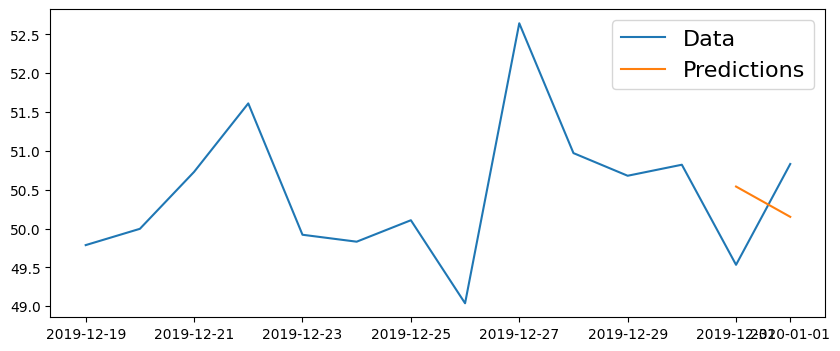

In [19]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [20]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))


Mean Absolute Percent Error: 0.0169


In [21]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))


Root Mean Squared Error: 0.8594350746797744
